# **Mental Fitness Tracker** :
# The Mental Fitness Tracker is an AI-powered project aimed at monitoring and supporting mental well-being using advanced algorithms. 
# It uses regression models to analyze and predict mental fitness based on various factors.



In [1]:
# Ignore warning messages to prevent them from being displayed during code execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
!pip install plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB 660.6 kB/s eta 0:00:29
   ---------------------------------------- 0.0/19.1 MB 393.8 kB/s eta 0:00:49
   ---------------------------------------- 0.1/19.1 MB 491.5 kB/s eta 0:00:39
   ---------------------------------------- 0.1/19.1 MB 492.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/19.1 MB 568.9 kB/s eta 0:00:34
   ---------------------------------------- 0.2/19.1 MB 583.1 kB/s eta 0:00:33
   ---------------------------------------- 0.2/19.1 MB 593.2 kB/s eta 0:00:32
   ---------------------------------------- 0.2/19.1 MB 626.9 kB/s eta 0:00:31
    --------------------------------------- 0.3/19.1 MB 608.1 kB/s eta 0:00:31
    --------------------------------------- 0.3/19.1 MB 632.7 kB/s eta 0:00:30
    --------------------------------------- 0.3/19.1 MB 636.3 kB/s eta

# **Reading Data**:

In [7]:
# Reading the CSV file containing prevalence data for mental and substance use disorder
df1 = pd.read_csv("C:/Users/Hp/Documents/PROJECTS/World Mental Health/prevalence-by-mental-and-substance-use-disorder.csv")

# Reading the CSV file containing data on mental and substance use as a share of disease
df2 = pd.read_csv("C:/Users/Hp/Documents/PROJECTS/World Mental Health/mental-and-substance-use-as-share-of-disease.csv")

In [8]:
df1.head()
# Displaying the first few rows of the DataFrame df1

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [9]:
df2.tail(10)
# Displaying the last few rows of the DataFrame df2

Entity Code  Year  \
6830  Zimbabwe  ZWE  2010   
6831  Zimbabwe  ZWE  2011   
6832  Zimbabwe  ZWE  2012   
6833  Zimbabwe  ZWE  2013   
6834  Zimbabwe  ZWE  2014   
6835  Zimbabwe  ZWE  2015   
6836  Zimbabwe  ZWE  2016   
6837  Zimbabwe  ZWE  2017   
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
6830                                           1.606235                                                
6831                                           1.758867                                                
6832                                           1.905674                                                
6833                                           2.024167                                                
6834                                           2.112216                                                
6835                                           2.193166                                                
6836                                           2.279813                                                
6837                                           2.364265                                                
6838                                           2.472949                                                
6839                                           2.525892

# 2 Datasets Merging

In [10]:
data = pd.merge(df1, df2)
data.head(10)
# Merging df1 and df2 into a single DataFrame and displaying the first 10 rows of the merged DataFrame

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

# Data Cleaning

In [11]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [12]:
data.drop('Code', axis=1, inplace=True)

In [13]:
data.tail(10)
# Displaying the last 10 rows of the DataFrame data

Entity  Year  \
6830  Zimbabwe  2010   
6831  Zimbabwe  2011   
6832  Zimbabwe  2012   
6833  Zimbabwe  2013   
6834  Zimbabwe  2014   
6835  Zimbabwe  2015   
6836  Zimbabwe  2016   
6837  Zimbabwe  2017   
6838  Zimbabwe  2018   
6839  Zimbabwe  2019   

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.207180                          
6831                                           0.207336                          
6832                                           0.207741                          
6833                                           0.208280                          
6834                                           0.208857                          
6835                                           0.209359                          
6836                                           0.209979                          
6837                                           0.210631                          
6838                                           0.211237                          
6839                                           0.211969                          

      Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.556640                             
6831                                           0.557104                             
6832                                           0.557908                             
6833                                           0.558888                             
6834                                           0.559929                             
6835                                           0.560882                             
6836                                           0.561768                             
6837                                           0.562612                             
6838                                           0.563283                             
6839                                           0.563820                             

      Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.094490                             
6831                                           0.094871                             
6832                                           0.095639                             
6833                                           0.096950                             
6834                                           0.098356                             
6835                                           0.099610                             
6836                                           0.100821                             
6837                                           0.101671                             
6838                                           0.102398                             
6839                                           0.102902                             

      Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           3.291569                              
6831                                           3.292964                              
6832                                           3.297124                              
6833                                           3.302881                              
6834                                           3.309390                              
6835                                           3.315701                              
6836                                           3.324230                              
6837                                           3.330569                              
6838                                           3.317500                              
6839                                           3.283934                              

      Prevalence - Dr

In [14]:
data.size,data.shape

(68400, (6840, 10))

In [17]:
# Setting column names using the columns attribute
data.columns = ['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol', 'mental_fitness']


In [18]:
data.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

# **Explaratory Analysis**
# Visualization

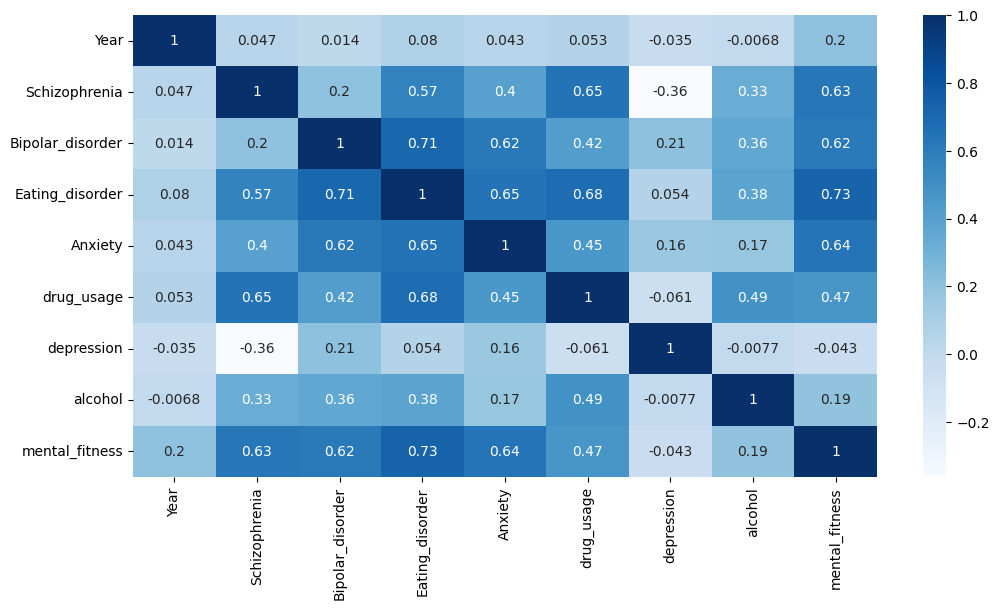

In [22]:
# Selecting only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Creating a heatmap of the correlation matrix for the numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')

# Displaying the plot
plt.show()


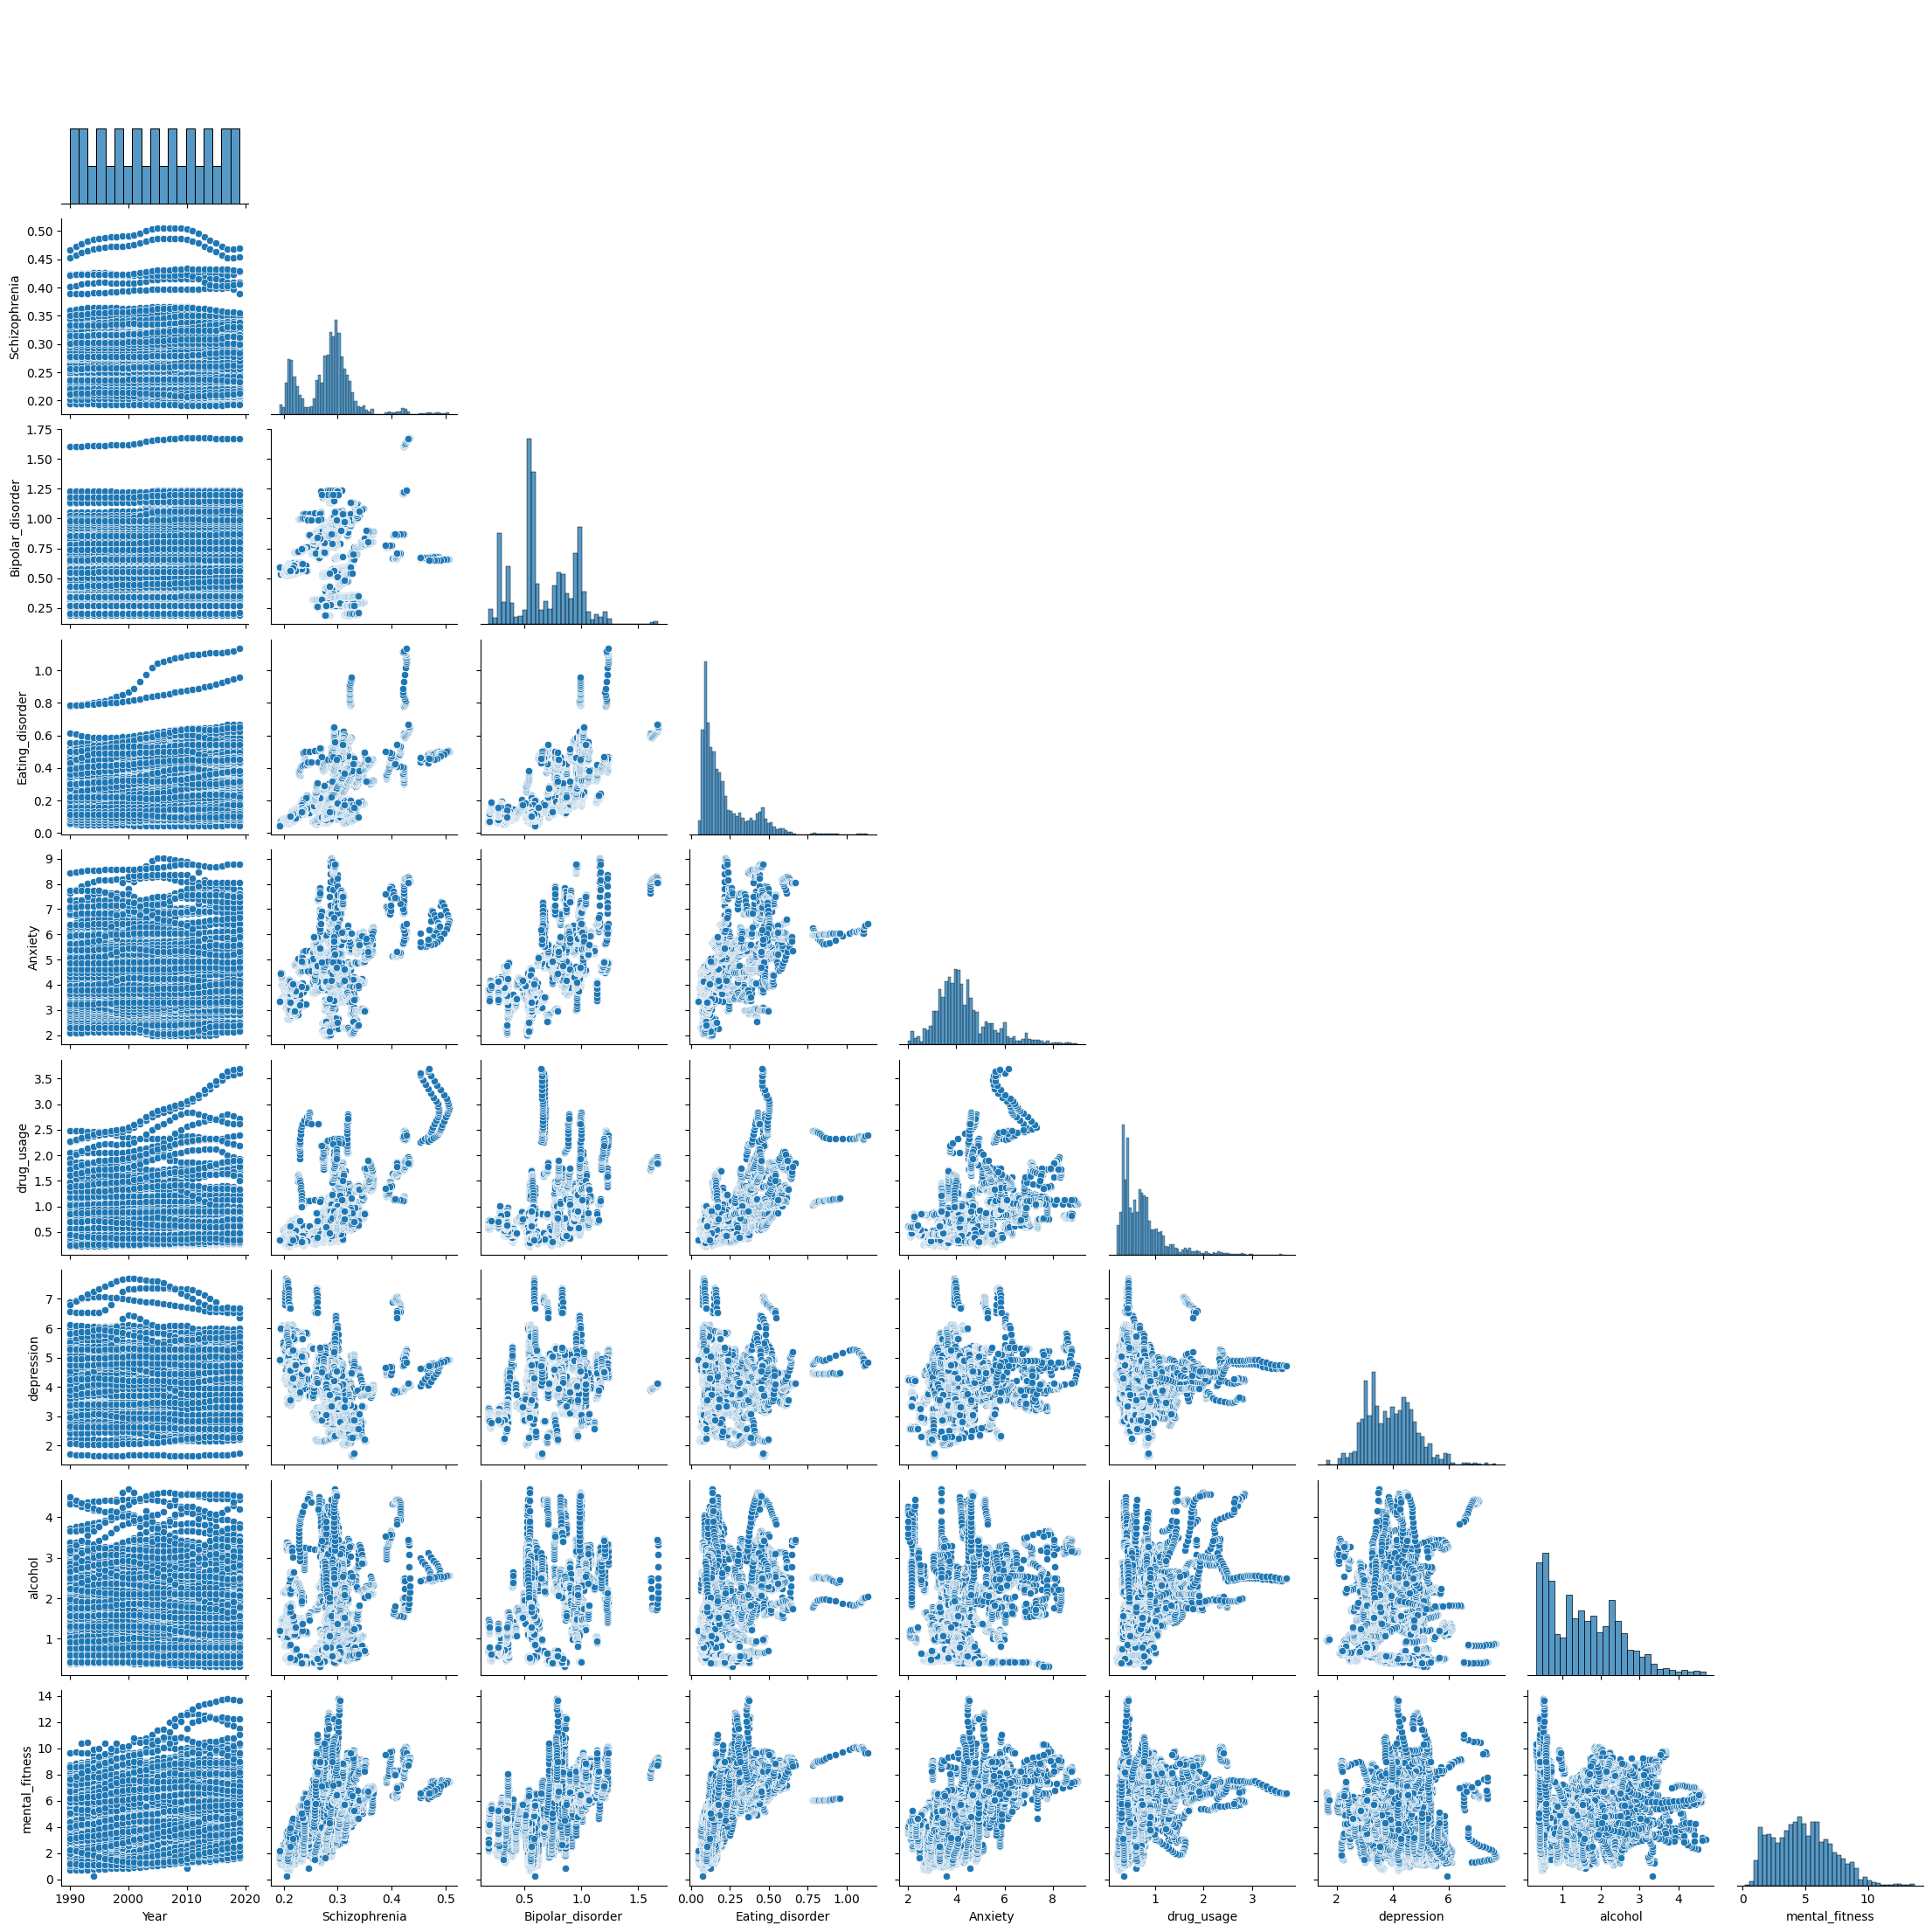

In [23]:
sns.pairplot(data, corner=True)
plt.show()
# Creating a pairwise scatter plot matrix for the columns in the DataFrame data

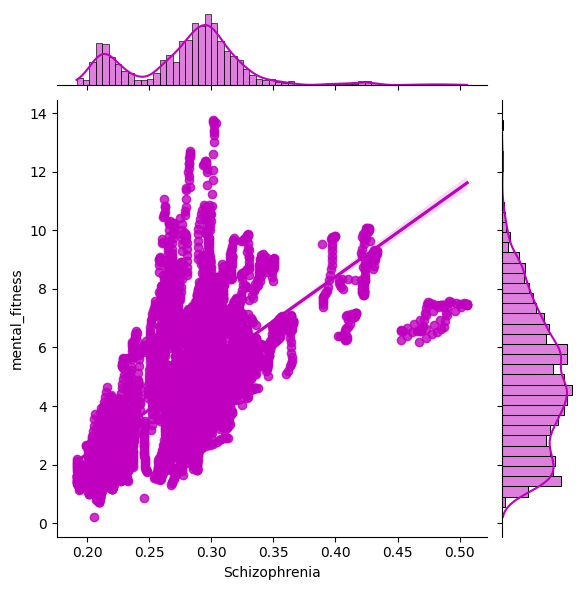

In [26]:
# Creating a jointplot with regression for 'Schizophrenia' and 'mental_fitness'
sns.jointplot(x='Schizophrenia', y='mental_fitness', data=data, kind='reg', color='m')

# Displaying the plot
plt.show()


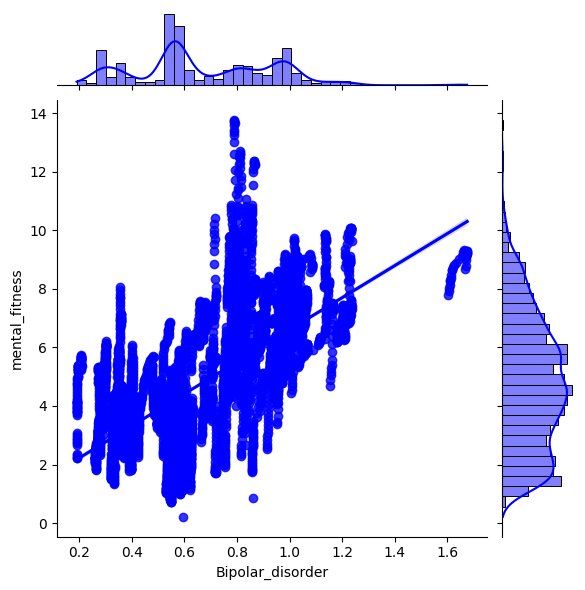

In [27]:
# Creating a jointplot with regression for 'Bipolar_disorder' and 'mental_fitness'
sns.jointplot(x='Bipolar_disorder', y='mental_fitness', data=data, kind='reg', color='blue')

# Displaying the plot
plt.show()


In [59]:
mean = data['mental_fitness'].mean()
# Calculating the mean value of the 'mental_fitness' column in the DataFrame data
mean
# Displaying the calculated mean value

4.8180618117506135

In [64]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

# **YEARWISE VARIATIONS IN MENTAL FITNESS OF DIFFERENT COUNTRIES**

In [63]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
fig = px.line(data, x='Year', y='mental_fitness', color='Country', markers=True, color_discrete_sequence=['red', 'blue'], template='plotly_dark')
fig.show()



In [62]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

In [65]:
pio.renderers.default = 'notebook'
fig = px.line(data, x="Year", y="mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [66]:
df = data.copy()

In [67]:
df.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 534.5+ KB


In [69]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])